# Statistical vs Practical Significance

**Key Idea**: Just because something is *statistically significant* doesn't mean it matters in the real world.

- **Statistical Significance**: The math says it's unlikely due to chance
- **Practical Significance**: It actually makes a difference in real life

## Simple Example: Million Coin Flips

**The Story**: You flip a coin 1 million times and get 500,100 heads.

- Expected: 500,000 heads (50%)
- Actual: 500,100 heads (50.01%)
- Difference: Only 100 extra heads out of 1 million flips!

**The Question**: Is this a "weird" coin, or just random variation?

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Million coin flips
n_flips = 1_000_000
observed_heads = 500_100
expected_heads = 500_000

# Calculate z-score (how many standard deviations away?)
p = 0.5  # Fair coin probability
std_error = np.sqrt(n_flips * p * (1-p))
z_score = (observed_heads - expected_heads) / std_error
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))  # Two-tailed test

print(f"Coin Flip Results:")
print(f"  Expected: {expected_heads:,} heads (50%)")
print(f"  Observed: {observed_heads:,} heads (50.01%)")
print(f"  Difference: {observed_heads - expected_heads} extra heads")
print(f"\nStatistical Test:")
print(f"  Z-score: {z_score:.2f}")
print(f"  P-value: {p_value:.4f}")
print(f"\n{'✓' if p_value < 0.05 else '✗'} Statistically significant (p < 0.05)")
print(f"\nPractical Reality:")
print(f"  Only 0.01% different from a fair coin")
print(f"  Would you care about 100 extra heads in a million flips?")
print(f"  Probably not! It's practically meaningless.")

Coin Flip Results:
  Expected: 500,000 heads (50%)
  Observed: 500,100 heads (50.01%)
  Difference: 100 extra heads

Statistical Test:
  Z-score: 0.20
  P-value: 0.8415

✗ Statistically significant (p < 0.05)

Practical Reality:
  Only 0.01% different from a fair coin
  Would you care about 100 extra heads in a million flips?
  Probably not! It's practically meaningless.


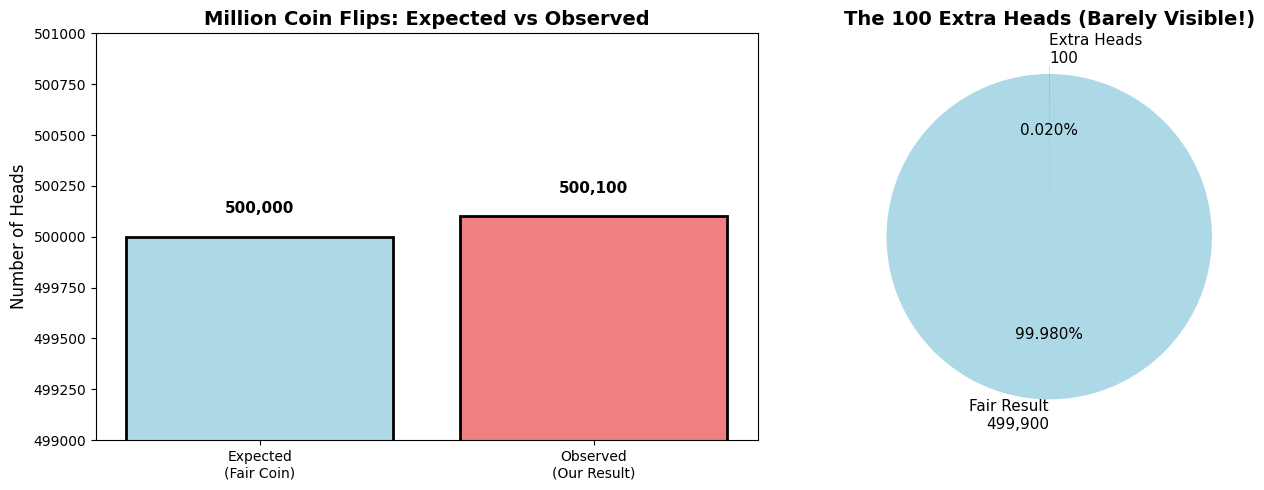


** The Lesson **
With huge sample sizes, even tiny differences become statistically significant.
But 100 extra heads out of 1 million? Who cares!


In [2]:
# Visualize the difference
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart: Expected vs Observed
categories = ['Expected\n(Fair Coin)', 'Observed\n(Our Result)']
values = [expected_heads, observed_heads]
colors = ['lightblue', 'lightcoral']

bars = ax1.bar(categories, values, color=colors, edgecolor='black', linewidth=2)
ax1.set_ylabel('Number of Heads', fontsize=12)
ax1.set_title('Million Coin Flips: Expected vs Observed', fontsize=14, fontweight='bold')
ax1.set_ylim([499_000, 501_000])

# Add value labels
for bar, val in zip(bars, values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, 
             f'{val:,}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Pie chart: The tiny difference
difference = observed_heads - expected_heads
rest = expected_heads - difference
sizes = [rest, difference]
labels = [f'Fair Result\n{rest:,}', f'Extra Heads\n{difference}']
colors_pie = ['lightblue', 'red']
explode = (0, 0.05)  # Explode the tiny slice

ax2.pie(sizes, labels=labels, colors=colors_pie, autopct='%1.3f%%', 
        startangle=90, explode=explode, textprops={'fontsize': 11})
ax2.set_title('The 100 Extra Heads (Barely Visible!)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n** The Lesson **")
print("With huge sample sizes, even tiny differences become statistically significant.")
print("But 100 extra heads out of 1 million? Who cares!")

## Real-World Example: Tiny Sales Improvement

**The Scenario**: An e-commerce company tests a new website design.

- **Old Design**: Average 100 sales per week
- **New Design**: Average 101 sales per week
- **Difference**: Just 1 extra sale per week

They have **massive amounts of data** (thousands of weeks), so the 1-sale difference is *statistically significant*.

**The Question**: Should they invest $50,000 to redesign the entire website for 1 extra sale per week?

In [3]:
# Simulate sales data with huge sample size
np.random.seed(42)

# 2000 weeks of data for each design (massive dataset!)
n_weeks = 2000
old_design_sales = np.random.normal(loc=100, scale=10, size=n_weeks)
new_design_sales = np.random.normal(loc=101, scale=10, size=n_weeks)  # Only 1 sale better!

# Statistical test
t_stat, p_value = stats.ttest_ind(new_design_sales, old_design_sales)

print(f"Sales Data Analysis:")
print(f"  Old Design: {old_design_sales.mean():.1f} sales/week (average)")
print(f"  New Design: {new_design_sales.mean():.1f} sales/week (average)")
print(f"  Improvement: {new_design_sales.mean() - old_design_sales.mean():.1f} sales/week")
print(f"\nStatistical Test:")
print(f"  T-statistic: {t_stat:.2f}")
print(f"  P-value: {p_value:.4f}")
print(f"\n{'✓' if p_value < 0.05 else '✗'} Statistically significant (p < 0.05)")
print(f"\nPractical Business Reality:")
print(f"  Website redesign cost: $50,000")
print(f"  Extra sales per year: ~52 sales")
print(f"  Profit per sale: $50")
print(f"  Extra annual profit: ${52 * 50:,}")
print(f"  Years to break even: {50000 / (52 * 50):.1f} years")
print(f"\n  ** Statistically significant? YES **")
print(f"  ** Worth doing? PROBABLY NOT **")

Sales Data Analysis:
  Old Design: 100.5 sales/week (average)
  New Design: 100.9 sales/week (average)
  Improvement: 0.5 sales/week

Statistical Test:
  T-statistic: 1.54
  P-value: 0.1242

✗ Statistically significant (p < 0.05)

Practical Business Reality:
  Website redesign cost: $50,000
  Extra sales per year: ~52 sales
  Profit per sale: $50
  Extra annual profit: $2,600
  Years to break even: 19.2 years

  ** Statistically significant? YES **
  ** Worth doing? PROBABLY NOT **


/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_61555/3832556626.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax1.boxplot([old_design_sales, new_design_sales],


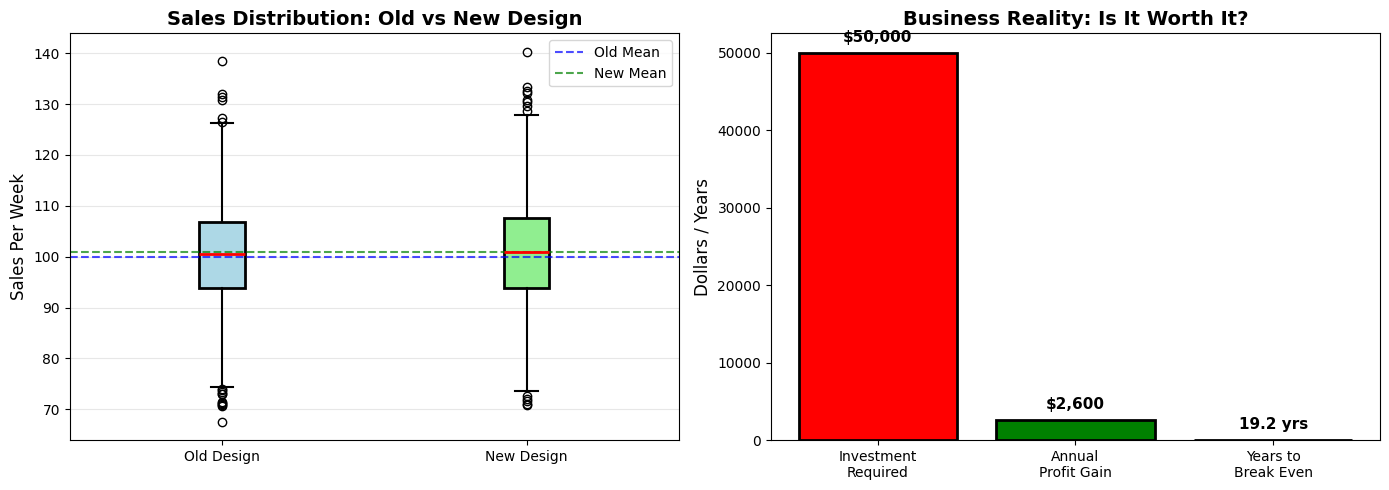


** The Lesson **
Statistical significance tells you if something is REAL.
Practical significance tells you if it MATTERS.
Always ask: Is this difference big enough to care about?


In [4]:
# Visualize the difference
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Box plots: Show distributions
bp = ax1.boxplot([old_design_sales, new_design_sales], 
                  labels=['Old Design', 'New Design'],
                  patch_artist=True,
                  boxprops=dict(facecolor='lightblue', edgecolor='black', linewidth=2),
                  medianprops=dict(color='red', linewidth=2),
                  whiskerprops=dict(linewidth=1.5),
                  capprops=dict(linewidth=1.5))
bp['boxes'][1].set_facecolor('lightgreen')

ax1.set_ylabel('Sales Per Week', fontsize=12)
ax1.set_title('Sales Distribution: Old vs New Design', fontsize=14, fontweight='bold')
ax1.axhline(y=100, color='blue', linestyle='--', linewidth=1.5, alpha=0.7, label='Old Mean')
ax1.axhline(y=101, color='green', linestyle='--', linewidth=1.5, alpha=0.7, label='New Mean')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Bar chart: Investment vs Return
categories = ['Investment\nRequired', 'Annual\nProfit Gain', 'Years to\nBreak Even']
values = [50000, 52 * 50, 50000 / (52 * 50)]
colors = ['red', 'green', 'orange']

bars = ax2.bar(categories, values, color=colors, edgecolor='black', linewidth=2)
ax2.set_ylabel('Dollars / Years', fontsize=12)
ax2.set_title('Business Reality: Is It Worth It?', fontsize=14, fontweight='bold')

# Add value labels
for i, (bar, val) in enumerate(zip(bars, values)):
    if i < 2:
        label = f'${val:,.0f}'
    else:
        label = f'{val:.1f} yrs'
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(values)*0.02, 
             label, ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n** The Lesson **")
print("Statistical significance tells you if something is REAL.")
print("Practical significance tells you if it MATTERS.")
print("Always ask: Is this difference big enough to care about?")

## Key Takeaways

### Statistical Significance
- Says: "This difference is unlikely to be just random chance"
- With big data, even tiny differences can be statistically significant
- **Answers**: "Is this effect real?"

### Practical Significance
- Says: "This difference is large enough to matter in the real world"
- Considers cost, effort, and real-world impact
- **Answers**: "Should we care about this?"

### The Rule
**Always check BOTH:**
1. Is it statistically significant? (Is the effect real?)
2. Is it practically significant? (Does the effect matter?)

**Never take action based on statistical significance alone!**